# Problem statement
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [83]:
#nltk.download('stopwords')
#pip install -U textblob

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import re
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
elon=pd.read_csv("Elon_musk.csv",encoding='cp1252')

# EDA

In [ ]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#### Removing spaces and symbol

In [ ]:
 # to remoce space and symbols
elon.Text=elon.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [ ]:
elon.Text

0                                      kunalb Im an alien
1       IDAACarmack Ray tracing on Cyberpunk with HDR ...
2                        joerogan Spotify Great interview
3                            gtera Doge is underestimated
4       teslacn Congratulations Tesla China for amazin...
                              ...                        
1994    flcnhvy True it sounds so surreal but the nega...
1995    PPathole Make sure to read ur terms amp condit...
1996                    TeslaGong PPathole Samwise Gamgee
1997               PPathole Altho Dumb and Dumber is UFUF
1998                              Progress update August 
Name: Text, Length: 1999, dtype: object

In [ ]:
re.sub('[^a-zA-Z ]', "", "I am cool you know $$$$ ;") # for checking purpose that how the code works

'I am cool you know  '

In [ ]:
elon.head()

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazin...


#### Making text to lower

In [ ]:
elon.Text=elon.Text.apply(lambda x: x.lower()) # used to make text into lower case

In [ ]:
elon.head()

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazin...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Splitting the words from line

In [ ]:
elon.Text=elon.Text.apply(lambda x: x.split())

In [ ]:
elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, ..."


#### Removing Stopwords

In [ ]:
elon.Text=elon.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [ ]:
elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, amazi..."


In [ ]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Stemming

In [ ]:

ps = PorterStemmer()
elon.Text=elon.Text.apply(lambda x: [ps.stem(word) for word in x])

In [ ]:
elon.Text.head()

0                                  [kunalb, im, alien]
1    [idaacarmack, ray, trace, cyberpunk, hdr, next...
2                [joerogan, spotifi, great, interview]
3                            [gtera, doge, underestim]
4    [teslacn, congratul, tesla, china, amaz, execu...
Name: Text, dtype: object

  #### Rejoining

In [ ]:
elon.Text=elon.Text.apply(lambda x: " ".join(x))

In [ ]:
elon.Text

0                                         kunalb im alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal neg propaganda stil...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                       ppathol altho dumb dumber ufuf
1998                                progress updat august
Name: Text, Length: 1999, dtype: object

# Sentiment Analysis

In [ ]:
elon['sentiment'] = elon['Text'].apply(lambda x:TextBlob(x).sentiment[0] )
elon[['Text','sentiment']].head()
# TextBlob(x).sentiment[1] = sentiment[1]= negative and positive [0], only positive=[1]

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


In [ ]:
elon.sentiment

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.000000
          ...   
1994    0.186667
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

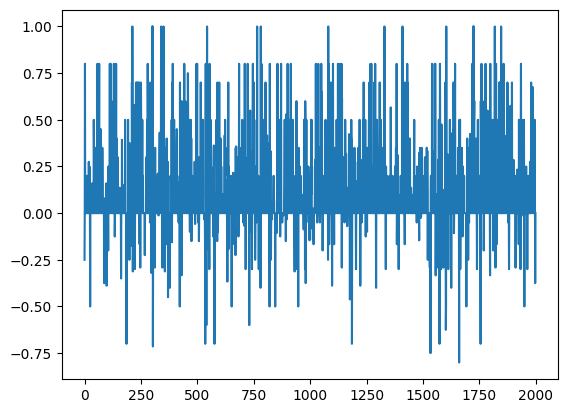

In [ ]:
plt.plot(elon.sentiment)

In [ ]:
elon

,Unnamed: 0,Text,sentiment
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000
2,3,joerogan spotifi great interview,0.800000
3,4,gtera doge underestim,0.000000
4,5,teslacn congratul tesla china amaz execut last...,0.000000
...,...,...,...
1994,1995,flcnhvi true sound surreal neg propaganda stil...,0.186667
1995,1996,ppathol make sure read ur term amp condit clic...,0.500000
1996,1997,teslagong ppathol samwis gamge,0.000000
1997,1998,ppathol altho dumb dumber ufuf,-0.375000


In [ ]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1999 non-null   int64  
 1   Text        1999 non-null   object 
 2   sentiment   1999 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
# Convert SentimentScore column to float
elon['sentiment'] = elon['sentiment'].astype(float)

# Create SentimentCategory column
elon['SentimentCategory'] = 'Neutral'
# dividing the values as per sentiment
for index, row in elon.iterrows():
    if row['sentiment'] > 0.25:
        elon.at[index, 'SentimentCategory'] = 'Positive'
    elif row['sentiment'] < -0.25:
        elon.at[index, 'SentimentCategory'] = 'Negative'



<Axes: xlabel='SentimentCategory', ylabel='count'>

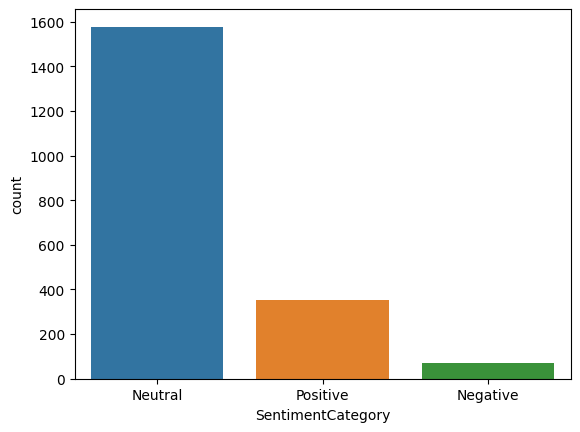

In [ ]:
sns.countplot(x=elon.SentimentCategory)

# Inference
as we can see that the neutral count is very high and positive count is the second. the negative sentiments are low

# problem statement
#### 1) Extract reviews of any product from ecommerce website like amazon
#### 2) Perform emotion mining


In [ ]:
import requests
from bs4 import BeautifulSoup

# Scraping reviews using BeautifulSoup

In [ ]:
link="https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [ ]:

review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')

    for i in range(0,len(reviews)):

        review_list.append(reviews[i].get_text().strip())


https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Airdopes-141-Playtime-Resistance-Bluetooth/product-reviews/B09N3ZNHTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [ ]:
    review_list

["So, it’s been a month since I bought it in March 2023, here to give an honest review on boAt Airdopes 141. Bought this for 999 INR. This review is long, and will help you decide whether to buy this or not.Features of these earbuds:1. ENx technology for better call quality.2. Beast Mode for low latency during gaming.3. boAt Signature Sound for good sound quality with 8mm dynamic drivers.4. SBC, AAC and Codec support available.5. ASAP (As Soon As Possible) Charge (5 min = 75 min)6. 5 hours battery in earbuds + 42 hours with case.7. IPX4, sweat and water splash resistant (Don’t immerse in water!!)8. IWP (Insta Wake’n Pair) technology for faster connectivity.9. Touch controls.10. Magnetic snap attach for both earbuds to the charging pins in the case.So, for this price, I was not expecting these many features! Lovely!Coming to my experience,1. ENx Technology: That works, the call quality is very good when inside, it cancels maximum noise from the environment including noise from fans. For

In [ ]:
len(review_list)

10

In [ ]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"So, it’s been a month since I bought it in March 2023, here to give an honest review on boAt Airdopes 141. Bought this for 999 INR. This review is long, and will help you decide whether to buy this or not.Features of these earbuds:1. ENx technology for better call quality.2. Beast Mode for low latency during gaming.3. boAt Signature Sound for good sound quality with 8mm dynamic drivers.4. SBC, AAC and Codec support available.5. ASAP (As Soon As Possible) Charge (5 min = 75 min)6. 5 hours battery in earbuds + 42 hours with case.7. IPX4, sweat and water splash resistant (Don’t immerse in water!!)8. IWP (Insta Wake’n Pair) technology for faster connectivity.9. Touch controls.10. Magnetic snap attach for both earbuds to the charging pins in the case.So, for this price, I was not expecting ..."
1,"First of all I am writing this review after using these extensively for about 8 months and I was so impressed with the overall sound quality, functionality and battery backup of these TWS that I bought three of these. Two from amazon and one from offline market.PROS1. Sound Quality: The sound quality is great for this budget. You will enjoy watching movies and listening to songs on these. The trebble is good so you will hear the dialogs very clearly. Base is decent at this price point but don’t expect them to be too good on the base as these are budget TWS but again the sound is great for what you are paying for.2. Battery Backup: For this budget the battery backup on these tiny things is outstanding. You can easily watch a full 3.5 to 4 hour movie without worrying that the battery wil..."
2,"The boAt Airdopes 141 are wireless earbuds that offer a decent sound quality, long battery life, and low latency mode for gaming. They are also IPX4 water-resistant and have touch controls and voice assistant support. However, they also have some drawbacks, such as a bulky case, average noise cancellation, and lack of volume control on the earbuds. Here are some pros and cons of the boAt Airdopes 141:ProsSound quality: The earbuds have 8mm dynamic drivers that deliver clear and balanced sound with good bass. The boAt signature sound is immersive and enjoyable for most genres of music12Battery life: The earbuds have a playback time of up to 6 hours per charge and an additional 36 hours with the case. They also support ASAP fast charge technology that gives up to 75 minutes of playtime w..."
3,"The Boat Airdopes 141 stands as a compelling option for those seeking exceptional wireless earbuds without breaking the bank. Boasting a stylish design and a host of impressive features, these earbuds offer a harmonious blend of audio quality, comfort, and affordability.Pros:Impressive Design: The Boat Airdopes 141 catches the eye with its impressive design, making a stylish statement while enhancing your audio experience.Dynamic 8mm Driver: With a dynamic 8mm driver, these earbuds deliver a compelling audio experience, balancing powerful bass and crisp treble to immerse you in your favorite tunes.Tailored Fit with Multiple Ear Tips: The inclusion of multiple ear tips ensures a comfortable fit that suits your ears, enhancing both comfort and sound isolation.IPX4 Water-Resistant Rating:..."
4,"Pros:1. The level of volume it gets to, is just awesome, it can get incredibly loud so if you're at the gym, these are perfect.2. Awesome Bass!3. Noise cancellation is just great, if you simply put them on without even any music playing, u won't be able to hear things around u very well, it's great for places like Gym.4. Lovely battery life, I've had them a week and only had to charge the case once, that too for just a few minutes. And the earbuds themselves, leave them in case for just five min and you'll be getting battery for a long long while.5. They are very comfortable, can be used for long periods of time.6. Affordable!7. The touch controls are very responsive, tap to pause, double tap right one for next song, double tap left one for either rewind or prev

# Pre-processing

In [ ]:
df.Reviews=df.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [ ]:
df.head()

,Reviews
0,So its been a month since I bought it in March here to give an honest review on boAt Airdopes Bought this for INR This review is long and will help you decide whether to buy this or notFeatures of these earbuds ENx technology for better call quality Beast Mode for low latency during gaming boAt Signature Sound for good sound quality with mm dynamic drivers SBC AAC and Codec support available ASAP As Soon As Possible Charge min min hours battery in earbuds hours with case IPX sweat and water splash resistant Dont immerse in water IWP Insta Waken Pair technology for faster connectivity Touch controls Magnetic snap attach for both earbuds to the charging pins in the caseSo for this price I was not expecting these many features LovelyComing to my experience ENx Technology That wor...
1,First of all I am writing this review after using these extensively for about months and I was so impressed with the overall sound quality functionality and battery backup of these TWS that I bought three of these Two from amazon and one from offline marketPROS Sound Quality The sound quality is great for this budget You will enjoy watching movies and listening to songs on these The trebble is good so you will hear the dialogs very clearly Base is decent at this price point but dont expect them to be too good on the base as these are budget TWS but again the sound is great for what you are paying for Battery Backup For this budget the battery backup on these tiny things is outstanding You can easily watch a full to hour movie without worrying that the battery will die Infact I have ...
2,The boAt Airdopes are wireless earbuds that offer a decent sound quality long battery life and low latency mode for gaming They are also IPX waterresistant and have touch controls and voice assistant support However they also have some drawbacks such as a bulky case average noise cancellation and lack of volume control on the earbuds Here are some pros and cons of the boAt Airdopes ProsSound quality The earbuds have mm dynamic drivers that deliver clear and balanced sound with good bass The boAt signature sound is immersive and enjoyable for most genres of musicBattery life The earbuds have a playback time of up to hours per charge and an additional hours with the case They also support ASAP fast charge technology that gives up to minutes of playtime with just minutes of charging ...
3,The Boat Airdopes stands as a compelling option for those seeking exceptional wireless earbuds without breaking the bank Boasting a stylish design and a host of impressive features these earbuds offer a harmonious blend of audio quality comfort and affordabilityProsImpressive Design The Boat Airdopes catches the eye with its impressive design making a stylish statement while enhancing your audio experienceDynamic mm Driver With a dynamic mm driver these earbuds deliver a compelling audio experience balancing powerful bass and crisp treble to immerse you in your favorite tunesTailored Fit with Multiple Ear Tips The inclusion of multiple ear tips ensures a comfortable fit that suits your ears enhancing both comfort and sound isolationIPX WaterResistant Rating The IPX waterresistant rat...
4,Pros The level of volume it gets to is just awesome it can get incredibly loud so if youre at the gym these are perfect Awesome Bass Noise cancellation is just great if you simply put them on without even any music playing u wont be able to hear things around u very well its great for places like Gym Lovely battery life Ive had them a week and only had to charge the case once that too for just a few minutes And the earbuds themselves leave them in case for just five min and youll be getting battery for a long long while They are very comfortable can be used for long periods of time Affordable The touch controls are very responsive tap to pause double tap right one for next song double tap left one for either rewind or previous song Can also pick up calls just by tapping Multiple ear co...


#### Make text to lower

In [ ]:
df.Reviews=df.Reviews.apply(lambda x: x.lower())

In [ ]:
df.head()

,Reviews
0,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immers water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani featur lovelycom experi enx technolog work call qualiti good insid cancel maximum nois environ includ nois fan outdoor call much nois yeah may nois cancel synchron even mark use mani time almost felt latenc dialogu person speak video perfectli sync earbud beast mode game havent tri game sound qualiti m...
1,first write review use extens month impress overal sound qualiti function batteri backup tw bought three two amazon one offlin marketpro sound qualiti sound qualiti great budget enjoy watch movi listen song trebbl good hear dialog clearli base decent price point dont expect good base budget tw sound great pay batteri backup budget batteri backup tini thing outstand easili watch full hour movi without worri batteri die infact even use straight hour batteri never gave ad case batteri bud charg soon put back case basic batteri last week use daili regular basi hour daili durabl use month assur fail durabl three bought work fine without issu also suggest friend collegu tw also work fine till date touch sensor get touch sensor bud use play paus skip track next previou song list pick call etc...
2,boat airdop wireless earbud offer decent sound qualiti long batteri life low latenc mode game also ipx waterresist touch control voic assist support howev also drawback bulki case averag nois cancel lack volum control earbud pro con boat airdop prossound qualiti earbud mm dynam driver deliv clear balanc sound good bass boat signatur sound immers enjoy genr musicbatteri life earbud playback time hour per charg addit hour case also support asap fast charg technolog give minut playtim minut charg case typec port conveni charginglow latenc mode earbud beast mode reduc audio lag game watch video low latenc mode activ tap left earbud three time featur enhanc game experi sync audio videoipx water resist earbud protect water sweat splash ipx rate make suitabl outdoor activ workout withstand li...
3,boat airdop stand compel option seek except wireless earbud without break bank boast stylish design host impress featur earbud offer harmoni blend audio qualiti comfort affordabilityprosimpress design boat airdop catch eye impress design make stylish statement enhanc audio experiencedynam mm driver dynam mm driver earbud deliv compel audio experi balanc power bass crisp trebl immers favorit tunestailor fit multipl ear tip inclus multipl ear tip ensur comfort fit suit ear enhanc comfort sound isolationipx waterresist rate ipx waterresist rate safeguard earbud splash light moistur make suitabl variou environ activitiesintuit touch control touch control offer conveni intuit way manag music call function without need reach deviceconsbatteri life consider boat airdop offer admir featur batt...
4,pro level volum get awesom get incred loud your gym perfect awesom bass nois cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respons tap paus doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth slightli muffl compar good qualiti headphon etc bass highlight great music movi game wont get crisp audio connect issu sometim turn bluetooth mani time work occasion daili frequent occurr edit month use frequent issu mic qualiti good use phone reason qualiti realli bad pc so

# import stopwords and stemmer

In [ ]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## splitting word from line¶

In [ ]:
df.Reviews=df.Reviews.apply(lambda x: x.split())

In [ ]:
df.head()

,Reviews
0,"[month, sinc, bought, march, give, honest, review, boat, airdop, bought, inr, review, long, help, decid, whether, buy, notfeatur, earbud, enx, technolog, better, call, qualiti, beast, mode, low, latenc, game, boat, signatur, sound, good, sound, qualiti, mm, dynam, driver, sbc, aac, codec, support, avail, asap, soon, possibl, charg, min, min, hour, batteri, earbud, hour, case, ipx, sweat, water, splash, resist, dont, immers, water, iwp, insta, waken, pair, technolog, faster, connect, touch, control, magnet, snap, attach, earbud, charg, pin, caseso, price, expect, mani, featur, lovelycom, experi, enx, technolog, work, call, qualiti, good, insid, cancel, maximum, nois, environ, includ, nois, fan, outdoor, call, ...]"
1,"[first, write, review, use, extens, month, impress, overal, sound, qualiti, function, batteri, backup, tw, bought, three, two, amazon, one, offlin, marketpro, sound, qualiti, sound, qualiti, great, budget, enjoy, watch, movi, listen, song, trebbl, good, hear, dialog, clearli, base, decent, price, point, dont, expect, good, base, budget, tw, sound, great, pay, batteri, backup, budget, batteri, backup, tini, thing, outstand, easili, watch, full, hour, movi, without, worri, batteri, die, infact, even, use, straight, hour, batteri, never, gave, ad, case, batteri, bud, charg, soon, put, back, case, basic, batteri, last, week, use, daili, regular, basi, hour, daili, durabl, use, month, assur, fail, durabl, ...]"
2,"[boat, airdop, wireless, earbud, offer, decent, sound, qualiti, long, batteri, life, low, latenc, mode, game, also, ipx, waterresist, touch, control, voic, assist, support, howev, also, drawback, bulki, case, averag, nois, cancel, lack, volum, control, earbud, pro, con, boat, airdop, prossound, qualiti, earbud, mm, dynam, driver, deliv, clear, balanc, sound, good, bass, boat, signatur, sound, immers, enjoy, genr, musicbatteri, life, earbud, playback, time, hour, per, charg, addit, hour, case, also, support, asap, fast, charg, technolog, give, minut, playtim, minut, charg, case, typec, port, conveni, charginglow, latenc, mode, earbud, beast, mode, reduc, audio, lag, game, watch, video, low, latenc, mode, activ, tap, ...]"
3,"[boat, airdop, stand, compel, option, seek, except, wireless, earbud, without, break, bank, boast, stylish, design, host, impress, featur, earbud, offer, harmoni, blend, audio, qualiti, comfort, affordabilityprosimpress, design, boat, airdop, catch, eye, impress, design, make, stylish, statement, enhanc, audio, experiencedynam, mm, driver, dynam, mm, driver, earbud, deliv, compel, audio, experi, balanc, power, bass, crisp, trebl, immers, favorit, tunestailor, fit, multipl, ear, tip, inclus, multipl, ear, tip, ensur, comfort, fit, suit, ear, enhanc, comfort, sound, isolationipx, waterresist, rate, ipx, waterresist, rate, safeguard, earbud, splash, light, moistur, make, suitabl, variou, environ, activitiesintuit, touch, control, touch, control, offer, conveni, intuit, way, manag, music, ..."
4,"[pro, level, volum, get, awesom, get, incred, loud, your, gym, perfect, awesom, bass, nois, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respons, tap, paus, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, ...]"


# removing stop words

In [ ]:
df.Reviews=df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [ ]:
df.head()

,Reviews
0,"[month, sinc, bought, march, give, honest, review, boat, airdop, bought, inr, review, long, help, decid, whether, buy, notfeatur, earbud, enx, technolog, better, call, qualiti, beast, mode, low, latenc, game, boat, signatur, sound, good, sound, qualiti, mm, dynam, driver, sbc, aac, codec, support, avail, asap, soon, possibl, charg, min, min, hour, batteri, earbud, hour, case, ipx, sweat, water, splash, resist, dont, immers, water, iwp, insta, waken, pair, technolog, faster, connect, touch, control, magnet, snap, attach, earbud, charg, pin, caseso, price, expect, mani, featur, lovelycom, experi, enx, technolog, work, call, qualiti, good, insid, cancel, maximum, nois, environ, includ, nois, fan, outdoor, call, ...]"
1,"[first, write, review, use, extens, month, impress, overal, sound, qualiti, function, batteri, backup, tw, bought, three, two, amazon, one, offlin, marketpro, sound, qualiti, sound, qualiti, great, budget, enjoy, watch, movi, listen, song, trebbl, good, hear, dialog, clearli, base, decent, price, point, dont, expect, good, base, budget, tw, sound, great, pay, batteri, backup, budget, batteri, backup, tini, thing, outstand, easili, watch, full, hour, movi, without, worri, batteri, die, infact, even, use, straight, hour, batteri, never, gave, ad, case, batteri, bud, charg, soon, put, back, case, basic, batteri, last, week, use, daili, regular, basi, hour, daili, durabl, use, month, assur, fail, durabl, ...]"
2,"[boat, airdop, wireless, earbud, offer, decent, sound, qualiti, long, batteri, life, low, latenc, mode, game, also, ipx, waterresist, touch, control, voic, assist, support, howev, also, drawback, bulki, case, averag, nois, cancel, lack, volum, control, earbud, pro, con, boat, airdop, prossound, qualiti, earbud, mm, dynam, driver, deliv, clear, balanc, sound, good, bass, boat, signatur, sound, immers, enjoy, genr, musicbatteri, life, earbud, playback, time, hour, per, charg, addit, hour, case, also, support, asap, fast, charg, technolog, give, minut, playtim, minut, charg, case, typec, port, conveni, charginglow, latenc, mode, earbud, beast, mode, reduc, audio, lag, game, watch, video, low, latenc, mode, activ, tap, ...]"
3,"[boat, airdop, stand, compel, option, seek, except, wireless, earbud, without, break, bank, boast, stylish, design, host, impress, featur, earbud, offer, harmoni, blend, audio, qualiti, comfort, affordabilityprosimpress, design, boat, airdop, catch, eye, impress, design, make, stylish, statement, enhanc, audio, experiencedynam, mm, driver, dynam, mm, driver, earbud, deliv, compel, audio, experi, balanc, power, bass, crisp, trebl, immers, favorit, tunestailor, fit, multipl, ear, tip, inclus, multipl, ear, tip, ensur, comfort, fit, suit, ear, enhanc, comfort, sound, isolationipx, waterresist, rate, ipx, waterresist, rate, safeguard, earbud, splash, light, moistur, make, suitabl, variou, environ, activitiesintuit, touch, control, touch, control, offer, conveni, intuit, way, manag, music, ..."
4,"[pro, level, volum, get, awesom, get, incred, loud, gym, perfect, awesom, bass, nois, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respons, tap, paus, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, highlight, ...]"


# stemming

In [ ]:
ps = PorterStemmer()
df.Reviews=df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [ ]:
df.head()

,Reviews
0,"[month, sinc, bought, march, give, honest, review, boat, airdop, bought, inr, review, long, help, decid, whether, buy, notfeatur, earbud, enx, technolog, better, call, qualiti, beast, mode, low, latenc, game, boat, signatur, sound, good, sound, qualiti, mm, dynam, driver, sbc, aac, codec, support, avail, asap, soon, possibl, charg, min, min, hour, batteri, earbud, hour, case, ipx, sweat, water, splash, resist, dont, immer, water, iwp, insta, waken, pair, technolog, faster, connect, touch, control, magnet, snap, attach, earbud, charg, pin, caseso, price, expect, mani, featur, lovelycom, experi, enx, technolog, work, call, qualiti, good, insid, cancel, maximum, noi, environ, includ, noi, fan, outdoor, call, ...]"
1,"[first, write, review, use, exten, month, impress, over, sound, qualiti, function, batteri, backup, tw, bought, three, two, amazon, one, offlin, marketpro, sound, qualiti, sound, qualiti, great, budget, enjoy, watch, movi, listen, song, trebbl, good, hear, dialog, clearli, base, decent, price, point, dont, expect, good, base, budget, tw, sound, great, pay, batteri, backup, budget, batteri, backup, tini, thing, outstand, easili, watch, full, hour, movi, without, worri, batteri, die, infact, even, use, straight, hour, batteri, never, gave, ad, case, batteri, bud, charg, soon, put, back, case, basic, batteri, last, week, use, daili, regular, basi, hour, daili, durabl, use, month, assur, fail, durabl, ...]"
2,"[boat, airdop, wireless, earbud, offer, decent, sound, qualiti, long, batteri, life, low, latenc, mode, game, also, ipx, waterresist, touch, control, voic, assist, support, howev, also, drawback, bulki, case, averag, noi, cancel, lack, volum, control, earbud, pro, con, boat, airdop, prossound, qualiti, earbud, mm, dynam, driver, deliv, clear, balanc, sound, good, bass, boat, signatur, sound, immer, enjoy, genr, musicbatteri, life, earbud, playback, time, hour, per, charg, addit, hour, case, also, support, asap, fast, charg, technolog, give, minut, playtim, minut, charg, case, typec, port, conveni, charginglow, latenc, mode, earbud, beast, mode, reduc, audio, lag, game, watch, video, low, latenc, mode, activ, tap, ...]"
3,"[boat, airdop, stand, compel, option, seek, except, wireless, earbud, without, break, bank, boast, stylish, design, host, impress, featur, earbud, offer, harmoni, blend, audio, qualiti, comfort, affordabilityprosimpress, design, boat, airdop, catch, eye, impress, design, make, stylish, statement, enhanc, audio, experiencedynam, mm, driver, dynam, mm, driver, earbud, deliv, compel, audio, experi, balanc, power, bass, crisp, trebl, immer, favorit, tunestailor, fit, multipl, ear, tip, inclu, multipl, ear, tip, ensur, comfort, fit, suit, ear, enhanc, comfort, sound, isolationipx, waterresist, rate, ipx, waterresist, rate, safeguard, earbud, splash, light, moistur, make, suitabl, variou, environ, activitiesintuit, touch, control, touch, control, offer, conveni, intuit, way, manag, music, ca..."
4,"[pro, level, volum, get, awesom, get, incr, loud, gym, perfect, awesom, bass, noi, cancel, great, simpli, put, without, even, music, play, u, wont, abl, hear, thing, around, u, well, great, place, like, gym, love, batteri, life, ive, week, charg, case, minut, earbud, leav, case, five, min, youll, get, batteri, long, long, comfort, use, long, period, time, afford, touch, control, respon, tap, pau, doubl, tap, right, one, next, song, doubl, tap, left, one, either, rewind, previou, song, also, pick, call, tap, multipl, ear, cover, provid, type, c, portcon, sound, qualiti, bad, anyth, slightli, muffl, compar, good, qualiti, headphon, etc, bass, highlight, ...]"


# rejoining

In [ ]:
df.Reviews=df.Reviews.apply(lambda x: " ".join(x))

In [ ]:
df.head()

,Reviews
0,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immer water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani featur lovelycom experi enx technolog work call qualiti good insid cancel maximum noi environ includ noi fan outdoor call much noi yeah may noi cancel synchron even mark use mani time almost felt latenc dialogu person speak video perfectli sync earbud beast mode game havent tri game sound qualiti mm dyn...
1,first write review use exten month impress over sound qualiti function batteri backup tw bought three two amazon one offlin marketpro sound qualiti sound qualiti great budget enjoy watch movi listen song trebbl good hear dialog clearli base decent price point dont expect good base budget tw sound great pay batteri backup budget batteri backup tini thing outstand easili watch full hour movi without worri batteri die infact even use straight hour batteri never gave ad case batteri bud charg soon put back case basic batteri last week use daili regular basi hour daili durabl use month assur fail durabl three bought work fine without issu also suggest friend collegu tw also work fine till date touch sensor get touch sensor bud use play pau skip track next previou song list pick call etc lat...
2,boat airdop wireless earbud offer decent sound qualiti long batteri life low latenc mode game also ipx waterresist touch control voic assist support howev also drawback bulki case averag noi cancel lack volum control earbud pro con boat airdop prossound qualiti earbud mm dynam driver deliv clear balanc sound good bass boat signatur sound immer enjoy genr musicbatteri life earbud playback time hour per charg addit hour case also support asap fast charg technolog give minut playtim minut charg case typec port conveni charginglow latenc mode earbud beast mode reduc audio lag game watch video low latenc mode activ tap left earbud three time featur enhanc game experi sync audio videoipx water resist earbud protect water sweat splash ipx rate make suitabl outdoor activ workout withstand ligh...
3,boat airdop stand compel option seek except wireless earbud without break bank boast stylish design host impress featur earbud offer harmoni blend audio qualiti comfort affordabilityprosimpress design boat airdop catch eye impress design make stylish statement enhanc audio experiencedynam mm driver dynam mm driver earbud deliv compel audio experi balanc power bass crisp trebl immer favorit tunestailor fit multipl ear tip inclu multipl ear tip ensur comfort fit suit ear enhanc comfort sound isolationipx waterresist rate ipx waterresist rate safeguard earbud splash light moistur make suitabl variou environ activitiesintuit touch control touch control offer conveni intuit way manag music call function without need reach deviceconsbatteri life consid boat airdop offer admir featur batteri ...
4,pro level volum get awesom get incr loud gym perfect awesom bass noi cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respon tap pau doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth slightli muffl compar good qualiti headphon etc bass highlight great music movi game wont get crisp audio connect issu sometim turn bluetooth mani time work occas daili frequent occurr edit month use frequent issu mic qualiti good use phone reason qualiti realli bad pc sometim whatsap

# Sentiment Analysis

# vader

In [89]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [90]:
from nltk.sentiment import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [91]:
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [92]:
df['sentiment_score'] = df['Reviews'].apply(lambda x:sentiment_score(x))



In [93]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,sentiment_score
0,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immer water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani feat...,0.9974
1,first write review use exten month impress over sound qualiti function batteri backup tw bought three two amazon one offlin marketpro sound qualiti sound qualiti great budget enjoy watch movi listen song trebbl good hear dialog clearli base decent price point dont expect good base budget tw sound great pay batteri backup budget batteri backup tini thing outstand easili watch full hour movi without worri batteri die infact even use straight hour batteri never gave ad case batteri bud charg so...,0.9969
2,boat airdop wireless earbud offer decent sound qualiti long batteri life low latenc mode game also ipx waterresist touch control voic assist support howev also drawback bulki case averag noi cancel lack volum control earbud pro con boat airdop prossound qualiti earbud mm dynam driver deliv clear balanc sound good bass boat signatur sound immer enjoy genr musicbatteri life earbud playback time hour per charg addit hour case also support asap fast charg technolog give minut playtim minut charg...,0.8786
3,boat airdop stand compel option seek except wireless earbud without break bank boast stylish design host impress featur earbud offer harmoni blend audio qualiti comfort affordabilityprosimpress design boat airdop catch eye impress design make stylish statement enhanc audio experiencedynam mm driver dynam mm driver earbud deliv compel audio experi balanc power bass crisp trebl immer favorit tunestailor fit multipl ear tip inclu multipl ear tip ensur comfort fit suit ear enhanc comfort sound i...,0.9905
4,pro level volum get awesom get incr loud gym perfect awesom bass noi cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respon tap pau doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth ...,0.9779


In [94]:
def sentiment_category(score1):
    if(score1 > 0.4):
        return 'Positive'
    elif(score1 < .1):
        return 'Negative'
    else:
        return 'Neutral'

In [95]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))


In [96]:
df

,Reviews,sentiment_score,sentiment
0,month sinc bought march give honest review boat airdop bought inr review long help decid whether buy notfeatur earbud enx technolog better call qualiti beast mode low latenc game boat signatur sound good sound qualiti mm dynam driver sbc aac codec support avail asap soon possibl charg min min hour batteri earbud hour case ipx sweat water splash resist dont immer water iwp insta waken pair technolog faster connect touch control magnet snap attach earbud charg pin caseso price expect mani feat...,0.9974,Positive
1,first write review use exten month impress over sound qualiti function batteri backup tw bought three two amazon one offlin marketpro sound qualiti sound qualiti great budget enjoy watch movi listen song trebbl good hear dialog clearli base decent price point dont expect good base budget tw sound great pay batteri backup budget batteri backup tini thing outstand easili watch full hour movi without worri batteri die infact even use straight hour batteri never gave ad case batteri bud charg so...,0.9969,Positive
2,boat airdop wireless earbud offer decent sound qualiti long batteri life low latenc mode game also ipx waterresist touch control voic assist support howev also drawback bulki case averag noi cancel lack volum control earbud pro con boat airdop prossound qualiti earbud mm dynam driver deliv clear balanc sound good bass boat signatur sound immer enjoy genr musicbatteri life earbud playback time hour per charg addit hour case also support asap fast charg technolog give minut playtim minut charg...,0.8786,Positive
3,boat airdop stand compel option seek except wireless earbud without break bank boast stylish design host impress featur earbud offer harmoni blend audio qualiti comfort affordabilityprosimpress design boat airdop catch eye impress design make stylish statement enhanc audio experiencedynam mm driver dynam mm driver earbud deliv compel audio experi balanc power bass crisp trebl immer favorit tunestailor fit multipl ear tip inclu multipl ear tip ensur comfort fit suit ear enhanc comfort sound i...,0.9905,Positive
4,pro level volum get awesom get incr loud gym perfect awesom bass noi cancel great simpli put without even music play u wont abl hear thing around u well great place like gym love batteri life ive week charg case minut earbud leav case five min youll get batteri long long comfort use long period time afford touch control respon tap pau doubl tap right one next song doubl tap left one either rewind previou song also pick call tap multipl ear cover provid type c portcon sound qualiti bad anyth ...,0.9779,Positive
5,well bought airdop month ago let give honest review get idea whether buy work fine charg box store airdop remain charg day sound qualiti sometim sound high sometim low volum sometim connect issu dont worri like week time less minut restart background noi cancel liter bad call voic cant heard clearli talk otherwi everyth good,0.1002,Neutral
6,use boat airdop bluetooth truli wireless ear headphon past six month must say exceed expect term perform durabilityfirstli batteri life headphon simpli outstand playtim hour rare worri charg frequent especi conveni im go travel enjoy uninterrupt music long period without rechargeth low latenc mode headphon gamechang game enthusiast like ensur minim delay sound output action screen significantli enhanc game experi whether im play actionpack firstperson shooter inten race game low latenc mode ...,0.9805,Positive
7,use headphon realli loud place day genuin surpri sound cancel u smile give facial express use sometim fall u fit well stay well sound great price rang listen lot music like realli loud never use full volum bass greatt over worth price use howev didnt face problem relat connect charg over great product upto price,0.9641,Positive
8,good cheap price got bass isnt amaz good loud realli great noi cancel like never would suggest u like blast ur music like fit ear properli minim sound leakag full volum cover matt

<Axes: xlabel='sentiment', ylabel='count'>

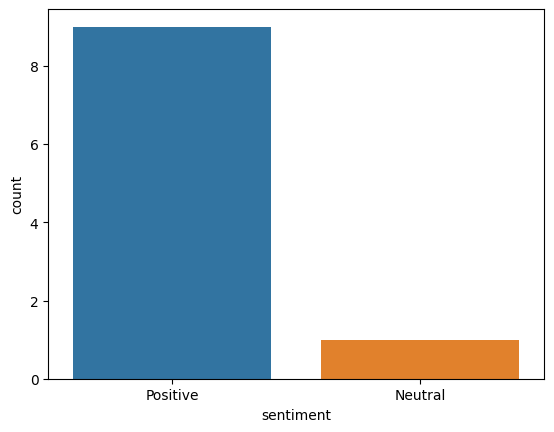

In [97]:
sns.countplot(x=df['sentiment'])

# inference
we can see that out of 10 times 7 times is positive sentiment, 3 times is negative sentiment and no neutral sentiment